In [1]:
# 模型测试或调试： 它可能是作者在模型开发过程中用来调试或者快速展示结果用的交互式环境。

# 逐帧图片可视化： 可能用于单张图像的检测与可视化，而不是视频流。

# 展示效果图： 它可能会用于生成论文中用的效果截图或做结果分析（比如显示 mask、bbox、score）

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot 
# 从 mmdetection（MMDetection）库中导入了三个 API 函数，分别用于目标检测模型的初始化、推理、以及结果可视化
# init_detector(config, checkpoint=None, device='cuda:0')，初始化一个检测模型
# inference_detector(model, img) 对输入的图片进行检测。其中，model：由 init_detector 返回的模型实例。img：输入图片，可以是路径字符串或已读取的图像数组。返回值：检测结果，通常是一个 list，每一项对应一个类别，包含了所有检测出的框和置信度。
# show_result_pyplot(model, img, result, score_thr=0.3)，将检测结果绘制在图片上并用 matplotlib 显示出来



In [2]:
# 配置文件
config = 'weights/tiny.py'
checkpoint = 'weights/tiny.pth'

model = init_detector(config, checkpoint, 'cuda:0')


load checkpoint from local path: weights/tiny.pth


In [3]:
test_img = 'imgs/road.png'
result = inference_detector(model, test_img)

# 对图像进行目标检测，

c:\users\administrator\documents\douyin_live\dy25\diff_test\new_train\swin-transformer-object-detection\mmdet\datasets\utils.py:64: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


In [4]:
bbox_result, segm_result = result

In [5]:
import mmcv
import numpy as np

In [6]:
bboxes = np.vstack(bbox_result)
# 把所有类别的边框拼接成一个二维数组
labels = [
    np.full(bbox.shape[0], i, dtype=np.int32)
    for i, bbox in enumerate(bbox_result)
]
labels = np.concatenate(labels)
# 给每个框加上对应类别编号

In [7]:
segms = mmcv.concat_list(segm_result)
segms = np.stack(segms, axis=0)
# 把嵌套的分割结果展开为列表
# 把所有的掩码堆成一个三维数组，便于可视化

In [8]:
# 读取并显示（图像的可视化）

In [9]:
import cv2

In [10]:
img = cv2.imread(test_img)

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

(-0.5, 1079.5, 1439.5, -0.5)

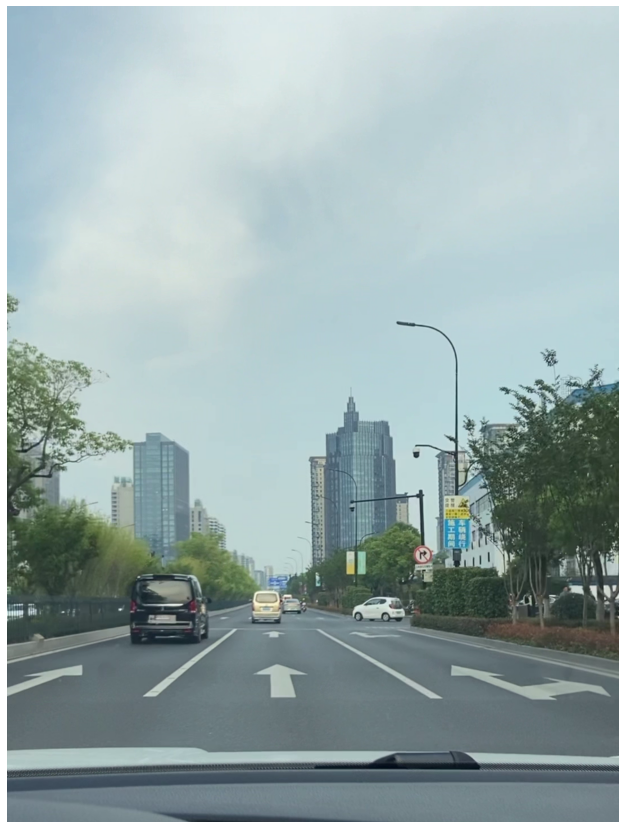

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 1079.5, 1439.5, -0.5)

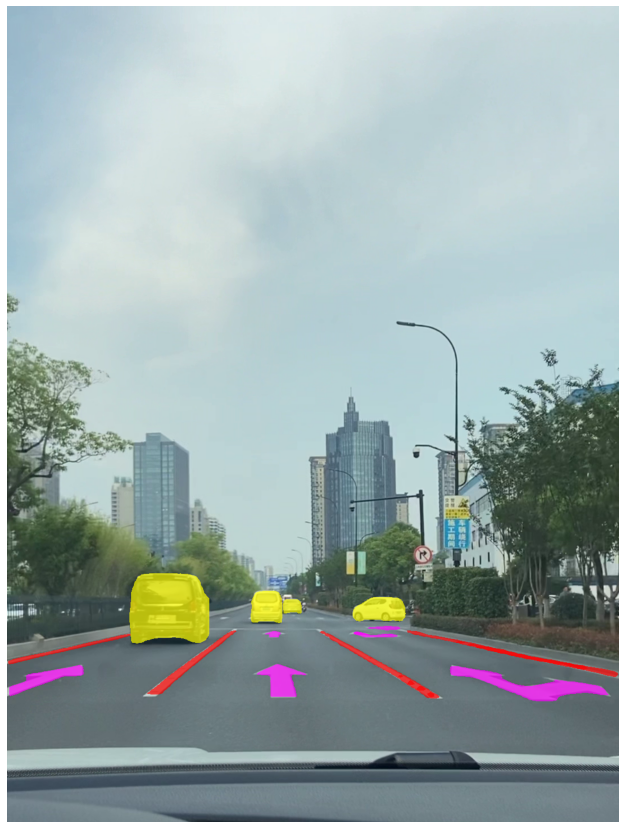

In [47]:
img_copy =  img.copy()
CLASSES = ('arrow', 'car', 'dashed', 'line')
colors  = [(255,0,255), (0,255,255), (0,255,0), (0,0,255)]
alpha_list = [0.3, 0.3, 0.3, 0.3]

# 遍历结果    
for i,box in enumerate(bboxes):   # 遍历所有的边框
    # 置信度
    conf =  box[-1]  # 最后一个元素（置信度）
    if conf > 0.3:
        # 检测到的框
        l,t,r,b = box[:4].astype('int')
        # 对应mask
        seg = segms[i]
        # 若mask为true，则将img_copy中的像素置为半透明
        alpha = alpha_list[labels[i]]
        color = colors[labels[i]]
        img_copy[seg > 0,0] = img_copy[seg > 0,0] * alpha + color[0] * (1-alpha)
        img_copy[seg > 0,1] = img_copy[seg > 0,1] * alpha + color[1] * (1-alpha)
        img_copy[seg > 0,2] = img_copy[seg > 0,2] * alpha + color[2] * (1-alpha)
      
        
        # 绘制检测框
        cv2.rectangle(img_copy,(l,t),(r,b),(0,255,0),2)
        # 绘制类别
        cv2.putText(img_copy,str(CLASSES[labels[i]]),(l,t-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,255),2)

# 显示
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')